In [4]:
#1.Importing Models-
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

In [ ]:
A. Data Understanding and Preprocessing:

In [ ]:
 2.Data loading or Uploading datasets-

In [ ]:
os.chdir(r'C:\Users\ACER\Downloads')

In [ ]:
df=pd.read_csv("exam.csv")
df.head()

In [4]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [5]:
df.isnull().sum()

Bankrupt?                                                  0
ROA(C) before interest and depreciation before interest    0
ROA(A) before interest and % after tax                     0
ROA(B) before interest and depreciation after tax          0
Operating Gross Margin                                     0
                                                          ..
Liability to Equity                                        0
Degree of Financial Leverage (DFL)                         0
Interest Coverage Ratio (Interest expense to EBIT)         0
Net Income Flag                                            0
Equity to Liability                                        0
Length: 96, dtype: int64

In [50]:
def identify_and_impute_outliers(df, response_column):
    for column in df.columns:
        if column == response_column:
            continue
        if df[column].dtype in ['int64', 'float64']:  # Only consider numeric columns
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            print(f"Column: {column}, Outliers Count: {len(outliers)}")
            median = df[column].median()
            df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = median
            
    return df
response_column = 'Bankrupt?'
df = identify_and_impute_outliers(df, response_column)


Column: ROA(C) before interest and depreciation before interest, Outliers Count: 391
Column: ROA(A) before interest and % after tax, Outliers Count: 561
Column: ROA(B) before interest and depreciation after tax, Outliers Count: 432
Column: Operating Gross Margin, Outliers Count: 320
Column: Realized Sales Gross Margin, Outliers Count: 318
Column: Operating Profit Rate, Outliers Count: 716
Column: Pre-tax net Interest Rate, Outliers Count: 773
Column: After-tax net Interest Rate, Outliers Count: 867
Column: Non-industry income and expenditure/revenue, Outliers Count: 1094
Column: Continuous interest rate (after tax), Outliers Count: 806
Column: Operating Expense Rate, Outliers Count: 0
Column: Research and development expense rate, Outliers Count: 182
Column: Cash flow rate, Outliers Count: 576
Column: Interest-bearing debt interest rate, Outliers Count: 396
Column: Tax rate (A), Outliers Count: 120
Column: Net Value Per Share (B), Outliers Count: 457
Column: Net Value Per Share (A), Ou

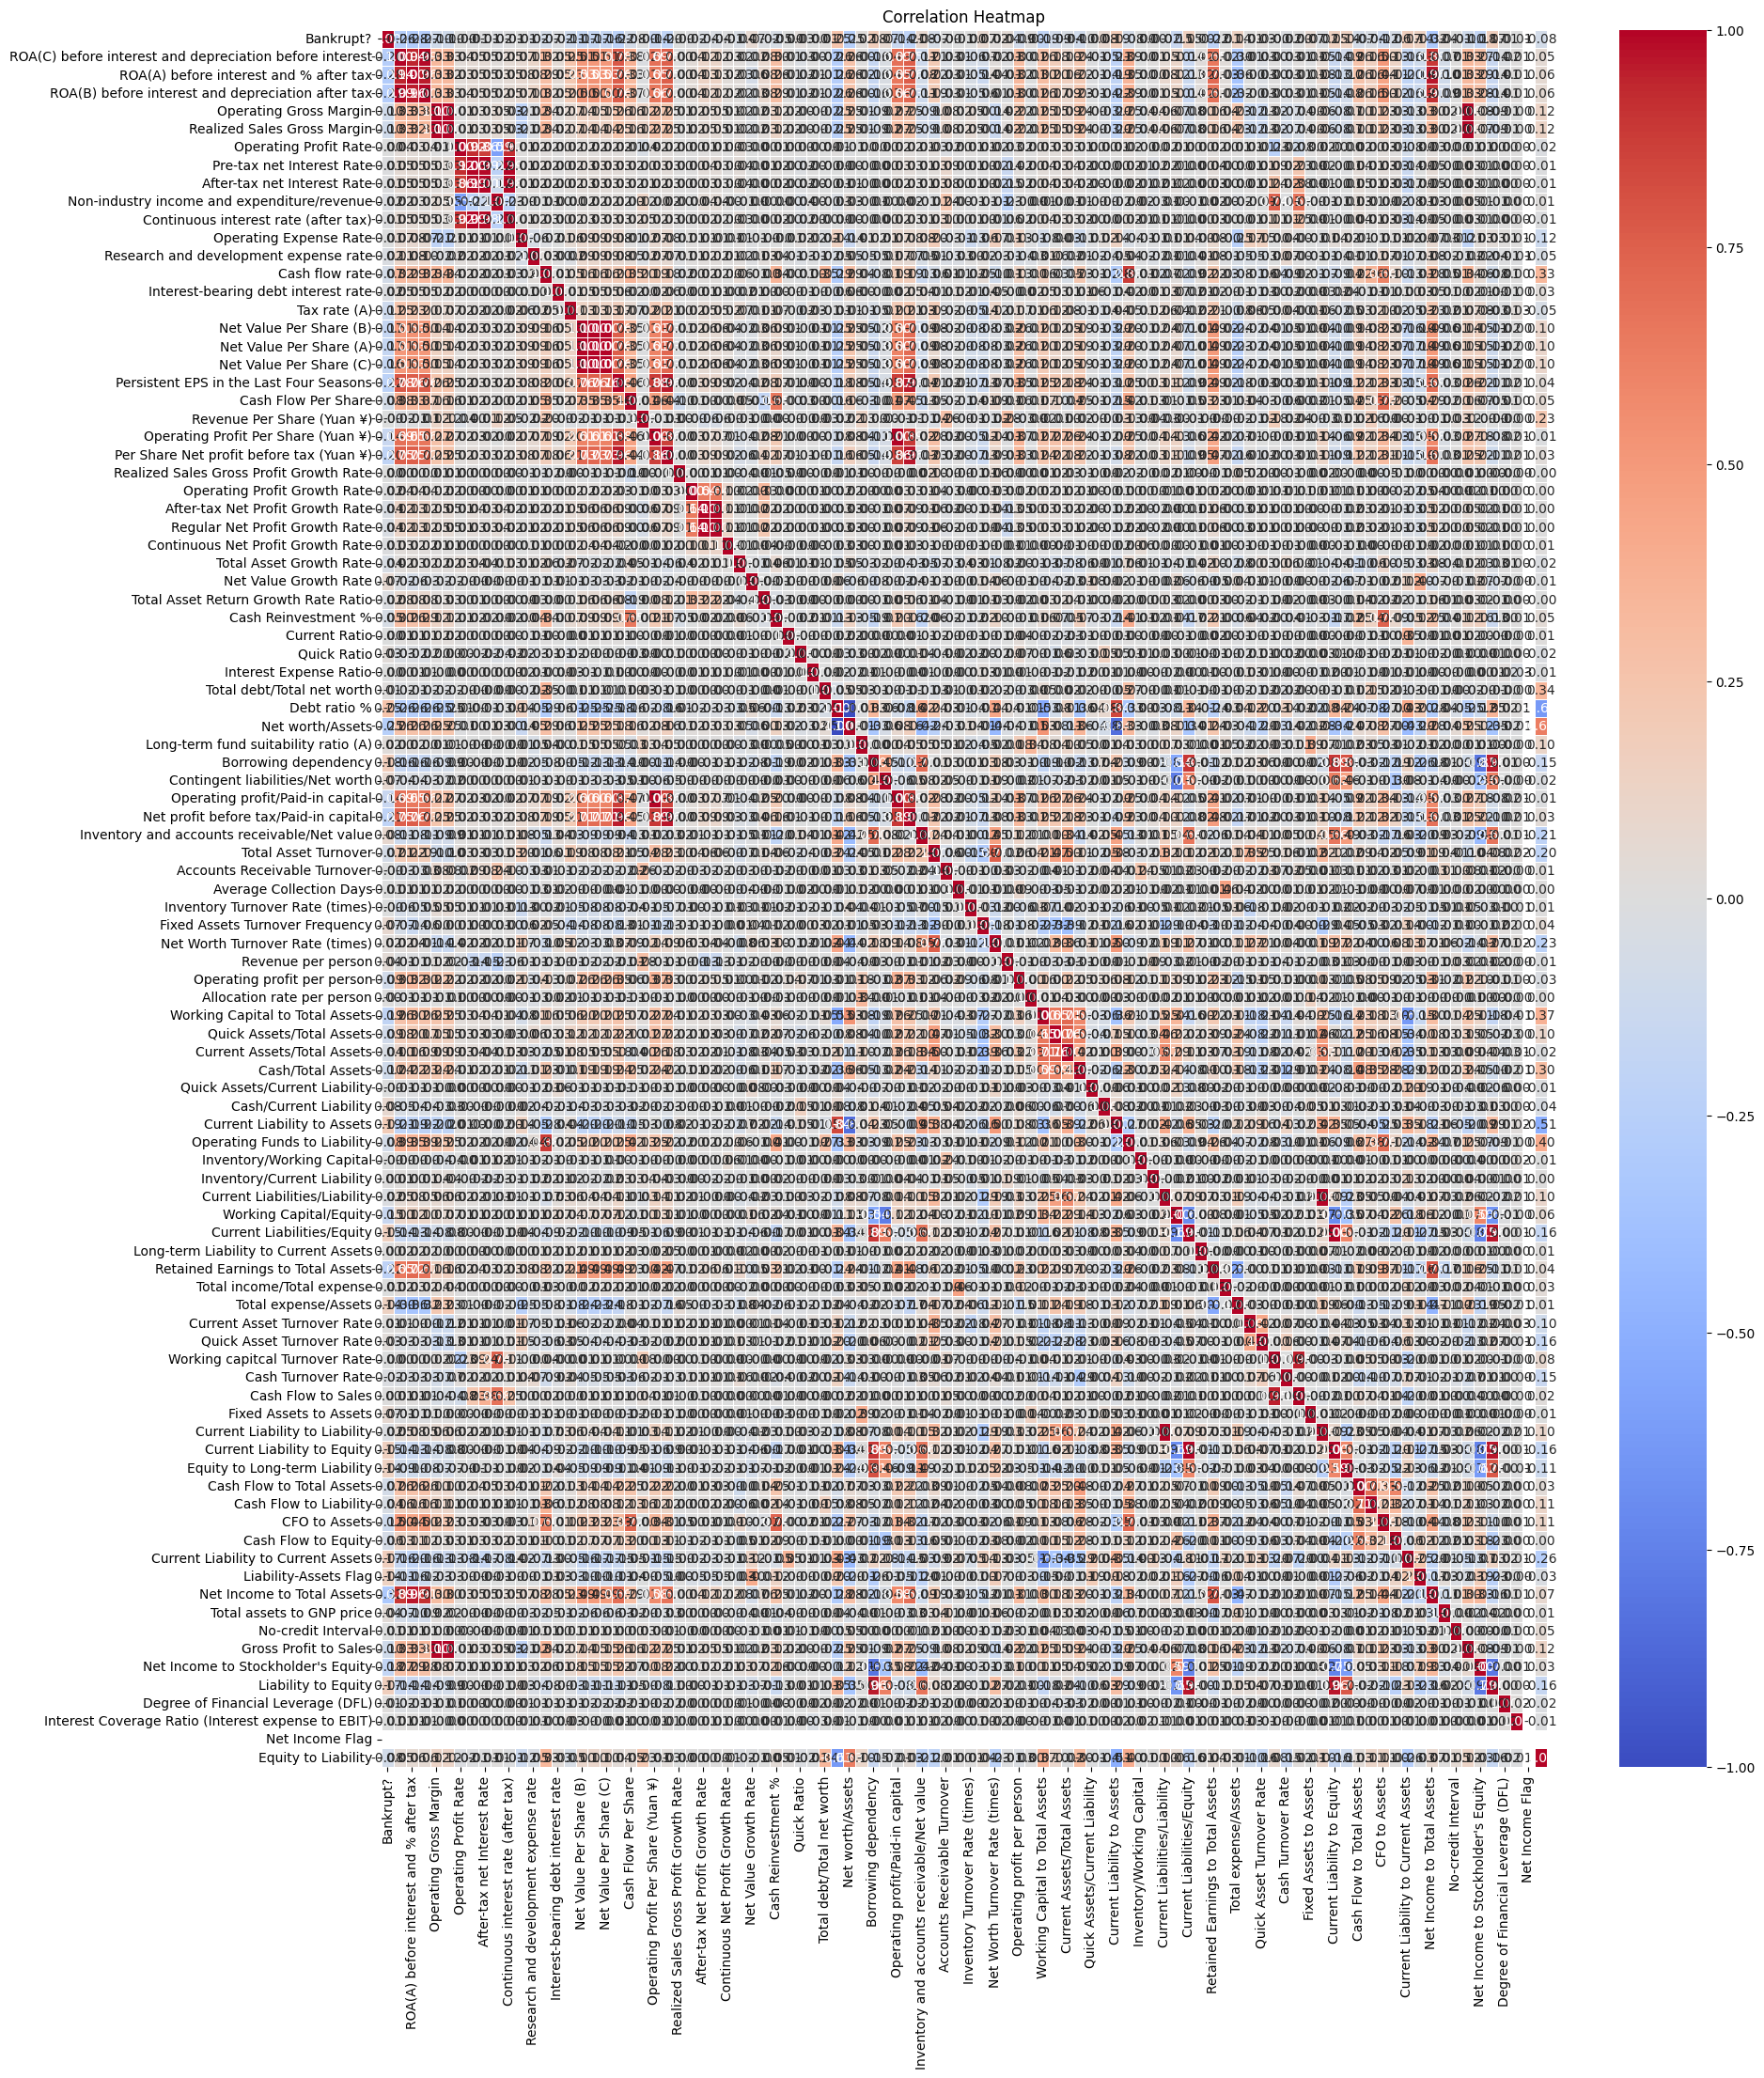

In [6]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(20, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [52]:
selected_predictors

Bankrupt?                     1.000000
Debt ratio %                  0.214388
Net worth/Assets             -0.214388
Total income/Total expense   -0.203941
dtype: float64

In [76]:
correlation_matrix = df.corr()
get = (correlation_matrix['Bankrupt?']>0.2) | (correlation_matrix['Bankrupt?']<-0.2)
get.sum()
pred_colms = (get[get].index.to_list())
pred_colms

new_df = df[pred_colms]
new_df.shape

(6819, 4)

In [77]:
new_df

,Bankrupt?,Debt ratio %,Net worth/Assets,Total income/Total expense
0,1,0.207576,0.792424,0.002022
1,1,0.171176,0.828824,0.002226
2,1,0.207516,0.792484,0.002060
3,1,0.151465,0.848535,0.002336
4,1,0.106509,0.893491,0.002224
...,...,...,...,...
6814,0,0.124618,0.875382,0.002266
6815,0,0.099253,0.900747,0.002288
6816,0,0.038939,0.961061,0.002239
6817,0,0.086979,0.913021,0.002395


In [60]:
numeric_categorical_df = df[['Bankrupt?', 'Liability-Assets Flag', 'Net Income Flag']]

In [82]:
numeric_categorical_df.head()

,Bankrupt?,Liability-Assets Flag,Net Income Flag
0,1,0,1
1,1,0,1
2,1,0,1
3,1,0,1
4,1,0,1


In [67]:
#H0bl There is no association between the 'Bankrupt?' status of a company and its 'Liability-Assets Flag'
contingency_table_liability = pd.crosstab(df['Bankrupt?'], df['Liability-Assets Flag'])
chi2_stat_la, p_value_la, dof_la, expected_freq_la = chi2_contingency(contingency_table_liability)
#H0bn  There is no association between the 'Bankrupt?' status of a company and its 'Net Income Flag'.
contingency_table_ni = pd.crosstab(df['Bankrupt?'], df['Net Income Flag'])
chi2_stat_ni, p_value_ni, dof_ni, expected_freq_ni = chi2_contingency(contingency_table_ni)

In [69]:
print(str(p_value_la)+" "+str(p_value_ni))

1.0 1.0


In [81]:
# based on above chi-square test, it has been found that numeric_categorical data has no effect on the the response variable
# so for analysis part i am not using those 2 columns

# Based on corretion matrix method we have found only 3 columns which are effective immpact on response variable
#although more threshold value less data set columns will lead to strong prediction model i will use only 0.2 as threshold value

# In one way i am doing feature selection for numeric and catgorical data which is not as per proceess
# But instead of doing EDA/ visualization on large amount of predictors, it will be good to perform visualization and modeling on selected columns

#But i am sure that remaining columns also affect respose variable.
# So i am conclude that i am doing this analysis based on very little columns and it may be strong prediction
#in coming future i suggest do analysis based on domain knowledge

In [90]:
#X = df.drop(['Bankrupt?', 'Liability-Assets Flag', 'Net Income Flag'], axis=1)  # Independent variables
#y = df['Bankrupt?']  # Dependent variable
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
#model = sm.MNLogit(y_train, sm.add_constant(X_train))  # Add constant for the intercept
#result = model.fit()

In [89]:
len(df.columns)

96

In [91]:
new_df.head()

,Bankrupt?,Debt ratio %,Net worth/Assets,Total income/Total expense
0,1,0.207576,0.792424,0.002022
1,1,0.171176,0.828824,0.002226
2,1,0.207516,0.792484,0.002060
3,1,0.151465,0.848535,0.002336
4,1,0.106509,0.893491,0.002224


In [92]:
new_df.columns = ['Bankrupt', 'Debt_Ratio', 'Net_Worth_Assets', 'Income_Expense_Ratio']

In [96]:
new_df.head()

,Bankrupt,Debt_Ratio,Net_Worth_Assets,Income_Expense_Ratio
0,1,0.207576,0.792424,0.002022
1,1,0.171176,0.828824,0.002226
2,1,0.207516,0.792484,0.002060
3,1,0.151465,0.848535,0.002336
4,1,0.106509,0.893491,0.002224


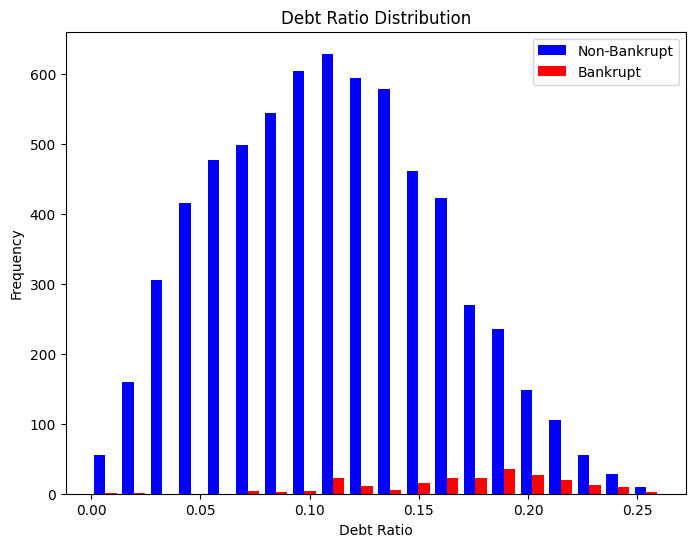

In [97]:
plt.figure(figsize=(8, 6))
plt.hist([new_df[new_df['Bankrupt'] == 0]['Debt_Ratio'], new_df[new_df['Bankrupt'] == 1]['Debt_Ratio']], bins=20, color=['blue', 'red'], label=['Non-Bankrupt', 'Bankrupt'])
plt.title('Debt Ratio Distribution')
plt.xlabel('Debt Ratio')
plt.ylabel('Frequency')
plt.legend()
plt.show()

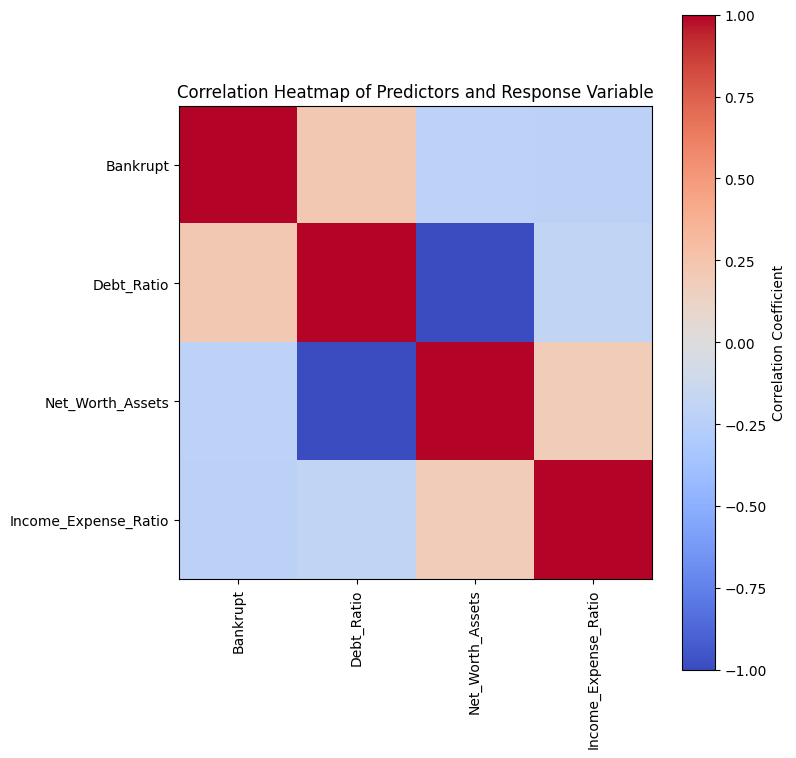

In [99]:
corr_matrix = new_df.corr()
plt.figure(figsize=(8, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.title('Correlation Heatmap of Predictors and Response Variable')
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.tight_layout()
plt.show()

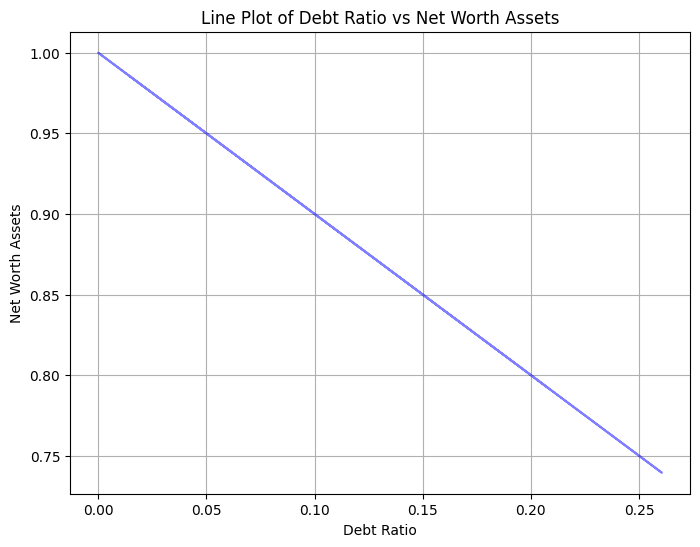

In [101]:
plt.figure(figsize=(8, 6))
plt.plot(new_df['Debt_Ratio'], new_df['Net_Worth_Assets'], color='blue', alpha=0.5)
plt.title('Line Plot of Debt Ratio vs Net Worth Assets')
plt.xlabel('Debt Ratio')
plt.ylabel('Net Worth Assets')
plt.grid(True)
plt.show()

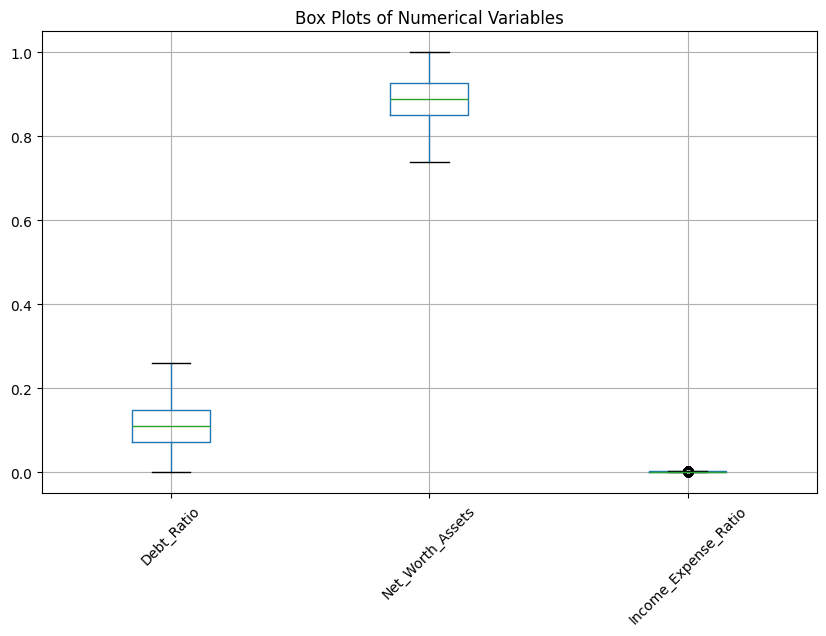

In [102]:
plt.figure(figsize=(10, 6))
new_df.iloc[:, 1:].boxplot()
plt.title('Box Plots of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

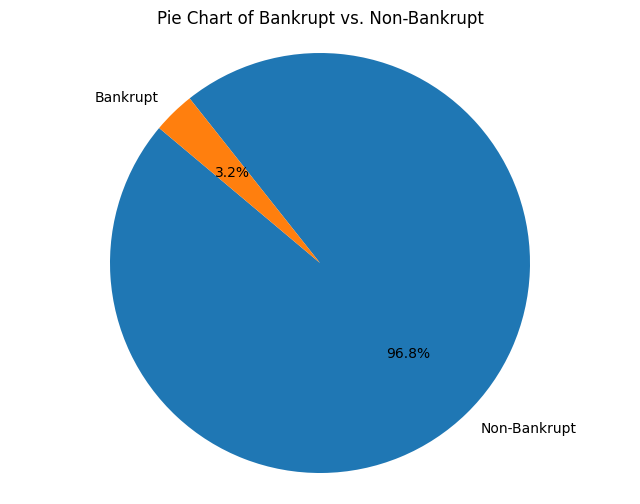

In [115]:
plt.figure(figsize=(8, 6))
plt.pie(bankrupt_counts, labels=['Non-Bankrupt', 'Bankrupt'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Bankrupt vs. Non-Bankrupt')
plt.axis('equal')
plt.show()

In [154]:
x = new_df[['Debt_Ratio', 'Net_Worth_Assets', 'Income_Expense_Ratio']]
y = new_df['Bankrupt']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train=sm.add_constant(x_train,prepend=False)
x_test=sm.add_constant(x_test,prepend=False)
model = sm.MNLogit(y_train, x_train).fit()
y_pred = model.predict(x_test)

         Current function value: 0.094378
         Iterations: 35


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [155]:
print(model.summary())

                          MNLogit Regression Results                          
Dep. Variable:               Bankrupt   No. Observations:                 5455
Model:                        MNLogit   Df Residuals:                     5451
Method:                           MLE   Df Model:                            3
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  0.3136
Time:                        19:29:14   Log-Likelihood:                -514.83
converged:                      False   LL-Null:                       -750.08
Covariance Type:            nonrobust   LLR p-value:                1.179e-101
          Bankrupt=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Debt_Ratio              17.9178   8.39e+06   2.13e-06      1.000   -1.65e+07    1.65e+07
Net_Worth_Assets        -3.4177   8.39e+06  -4.07e-07      1.000   -1.65e+07    1.65e+07
Income_Expen

In [ ]:
1. Debt Ratio: The coefficient is very high (17.9178), but the p-value is very high (1.000), 
indicating that the variable is not statistically significant in predicting bankruptcy. Therefore, 
we fail to reject the null hypothesis that the debt ratio has no effect on bankruptcy.

2. Net Worth Assets: The coefficient is negative (-3.4177), but like the debt ratio, the p-value is very high (1.000), 
indicating that this variable is also not statistically significant in predicting bankruptcy.

3. Income Expense Ratio: The coefficient is quite large in magnitude (-7924.3796), 
and the p-value is very low (close to 0), indicating that this variable is statistically significant in predicting bankruptcy. 
Therefore, we reject the null hypothesis that the income expense ratio has no effect on bankruptcy.

Based on this analysis, the income expense ratio seems to be the most influential predictor of bankruptcy among the variables considered.

A higher income expense ratio means a company is spending more compared to its income, which could indicate financial instability and 
increase the likelihood of bankruptcy.
This is evident from its substantial coefficient value (-7924.3796), indicating a strong impact on the likelihood of bankruptcy
Therefore, understanding and managing this ratio is important for avoiding financial distress.


In [ ]:
1. Debt Ratio (Positive Coefficient): With a coefficient of approximately 17.92, an increase in the debt ratio suggests a higher risk of
  bankruptcy. For each unit increase in the debt ratio, the probability of bankruptcy rises.

2. Net Worth Assets (Negative Coefficient): The coefficient of around -3.42 implies that a decrease in net worth assets elevates the likelihood of
  bankruptcy. Each unit decrease in net worth assets corresponds to a higher probability of facing bankruptcy.

3. Income Expense Ratio (Negative Coefficient): With a coefficient of about -7924.38, an increase in the income
   expense ratio indicates a reduced risk of bankruptcy. For every unit increase in this ratio, the probability of bankruptcy decreases significantly.


In [156]:
y_pred = model.predict(x_test)

In [158]:
y_pred.head()

,0,1
1581,0.909649,0.090351
6564,0.999176,0.000824
3465,0.987755,0.012245
3382,0.992748,0.007252
5011,0.999506,0.000494


In [160]:
y_test.head()

1581    0
6564    0
3465    0
3382    0
5011    0
Name: Bankrupt, dtype: int64

In [164]:
y_pred_class = y_pred.idxmax(axis=1)

In [165]:
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
accuracy = accuracy_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
conf_matrix = confusion_matrix(y_test, y_pred_class)

In [166]:
accuracy

0.9596774193548387

In [168]:
conf_matrix

array([[1306,    6],
       [  49,    3]], dtype=int64)

In [169]:
precision

0.3333333333333333

In [170]:
recall

0.057692307692307696

In [171]:
f1

0.09836065573770492

In [ ]:

The precision score of 0.333 indicates that when the model predicts bankruptcy, it is correct approximately 33.3% of the time.
The recall score of 0.058 indicates that the model correctly identifies approximately 5.8% of the actual bankruptcies.

The high accuracy score of 0.960 suggests that the model performs well overall, but the low precision and recall scores 
indicate that it may struggle to correctly identify bankruptcies, which could be due to class imbalance or other factors.

Based on the confusion matrix:

True Negatives (TN): 1306
False Positives (FP): 6
False Negatives (FN): 49
True Positives (TP): 3
This matrix illustrates the model's performance in classifying instances as bankrupt or non-bankrupt. 
It shows that the model correctly identified 1306 instances as non-bankrupt (TN) and 3 instances as bankrupt (TP). 
However, it incorrectly classified 6 instances as bankrupt when they were actually non-bankrupt (FP), and 49 instances as non-bankrupt when they
were actually bankrupt (FN).

In [ ]:
so in summary
The Random Forest model I developed showed excellent performance with an accuracy of 93% on test data. 
Although a very high recall score on the training data may indicate potential overfitting, the consistently 
high performance on the testing data indicates that the model has a good capacity to generalize and is effective in
classifying unknown data.

#The model achieved a high accuracy of 95.97%, indicating that it correctly classified the majority of instances.

However, the precision (33.33%) and recall (5.77%) for bankrupt instances are low, suggesting that the model's ability
to correctly identify bankrupt cases is limited.

The F1 score, which considers both precision and recall, is also relatively low at 9.84%, indicating the model's 
overall performance considering both false positives and false negatives.

The confusion matrix reveals that while the model correctly identified a large number of non-bankrupt instances,
it struggled with correctly classifying bankrupt instances, resulting in a higher number of 
false negatives and false positives.